
# Experiment: Fit Prev Disengaged TODO
**Goal**: Fit model with a regressor that indicated prev disengaged (was violation or trial not started)

**Summary**: The weight decreases with this regressor because these are not exclusive events. Sometimes is can be both a previous violation and previous not started. As feature magnitude gets larger, weights get smaller. Future notebooks need to carefully construct this combined regressor, and adjust for proper scaling. Then, comparative analyses can be done.



Related notebooks:

* `2024_02_20_dev_trial_not_started.ipynb`
* `2024_02_20_EXP_fit_prev_trial_not_started.ipynb`
* `2024_02_20_EXP_fit_n_prev_trial_not_started.ipynb`
* `2024_02_20_EXP_fit_prev_disengaged_scaled.ipynb`

## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment
from multiglm.experiments.experiment_sigma_sweep import ExperimentSigmaSweep
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.visualizations.model_visualizer import ModelVisualizer
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorPrevDisengaged
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

## Model Configs

In [9]:
model_config = {
    "prev_trial_not_started": {
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorPrevDisengaged,
        "filter_implementation": {},  # no filter
        "design_matrix_generator_args": {
            "prev_disengaged": True,
        },
    }
}

params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": [None],
    "model_config": model_config,
}

save_name = "2024_02_21_fit_prev_disengaged.pkl"
order = [
    "bias",
    "prev_disengaged",
    "s_a",
    "s_b",
    "prev_sound_avg",
    "prev_correct",
    "prev_choice",
]

## Run

In [3]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<

 ***** evaluating model prev_trial_not_started w/ sigma 0.07 *****
         Current function value: 64794.967950
         Iterations: 27
         Function evaluations: 83
         Gradient evaluations: 71

 ***** evaluating model prev_trial_not_started w/ sigma 0.13 *****
         Current function value: 64544.782794
         Iterations: 24
         Function evaluations: 89
         Gradient evaluations: 77

 ***** evaluating model prev_trial_not_started w/ sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 64467.811528
         Iterations: 27
         Function evaluations: 42
         Gradient evaluations: 42

 ***** evaluating model prev_trial_not_started w/ sigma 0.5 *****
         Current function value: 64446.2

## Visualize

In [10]:
experiment = load_experiment(save_name)
palette = "Set2"
mv = ModelVisualizer(experiment)

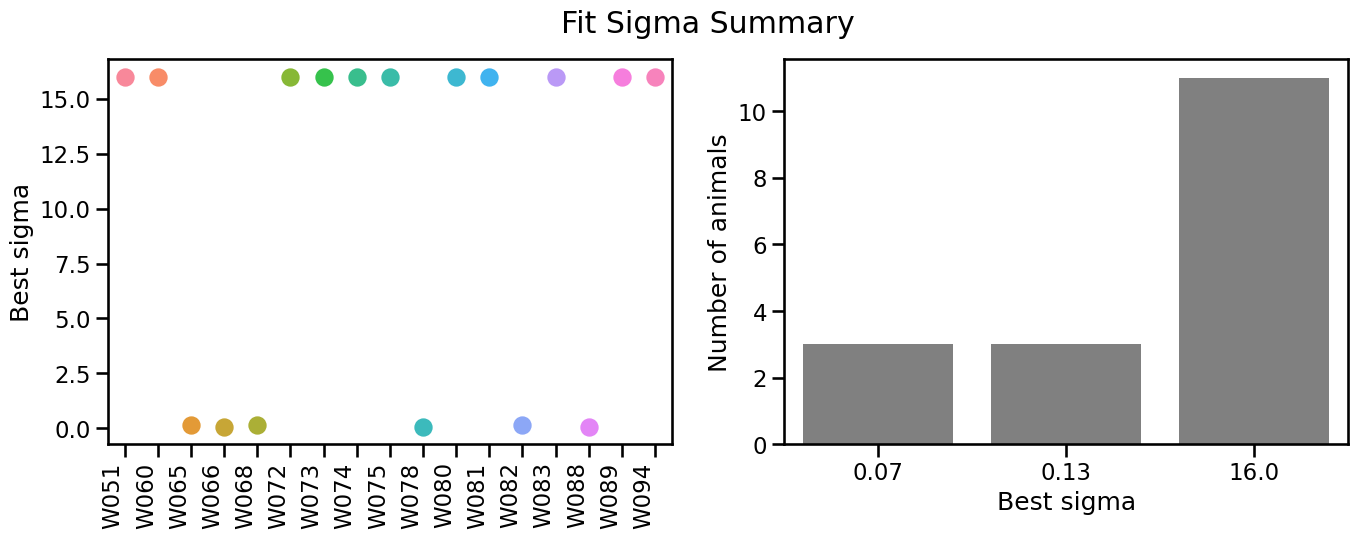

In [5]:
mv.plot_sigma_summary()

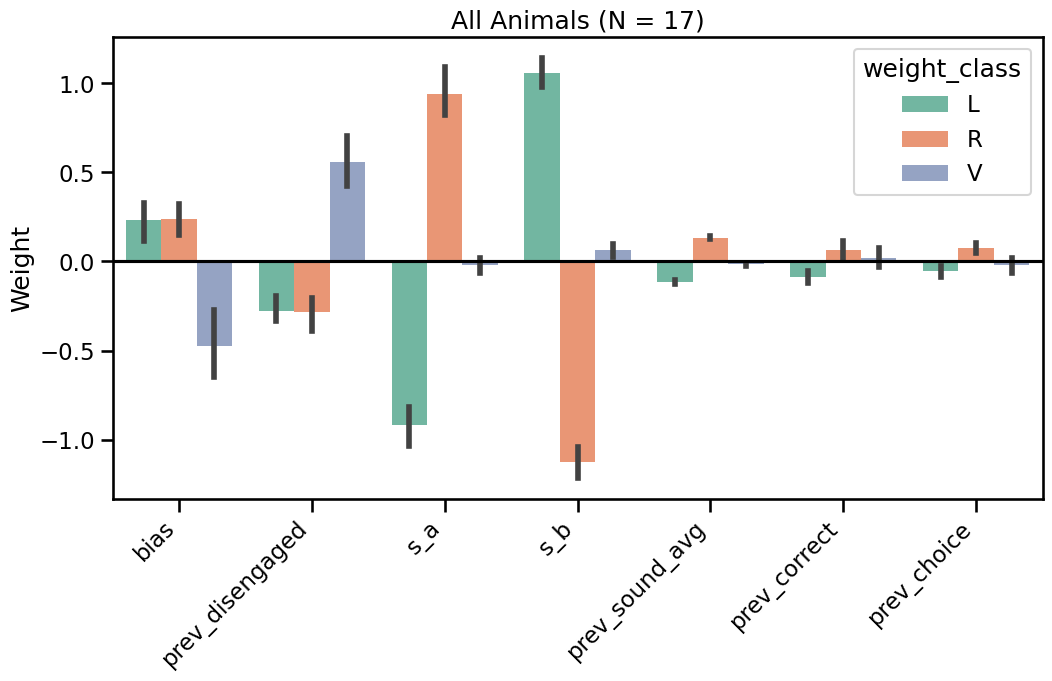

In [11]:
mv.plot_weights_summary(palette=palette, order=order)

(-1.5, 2.5)

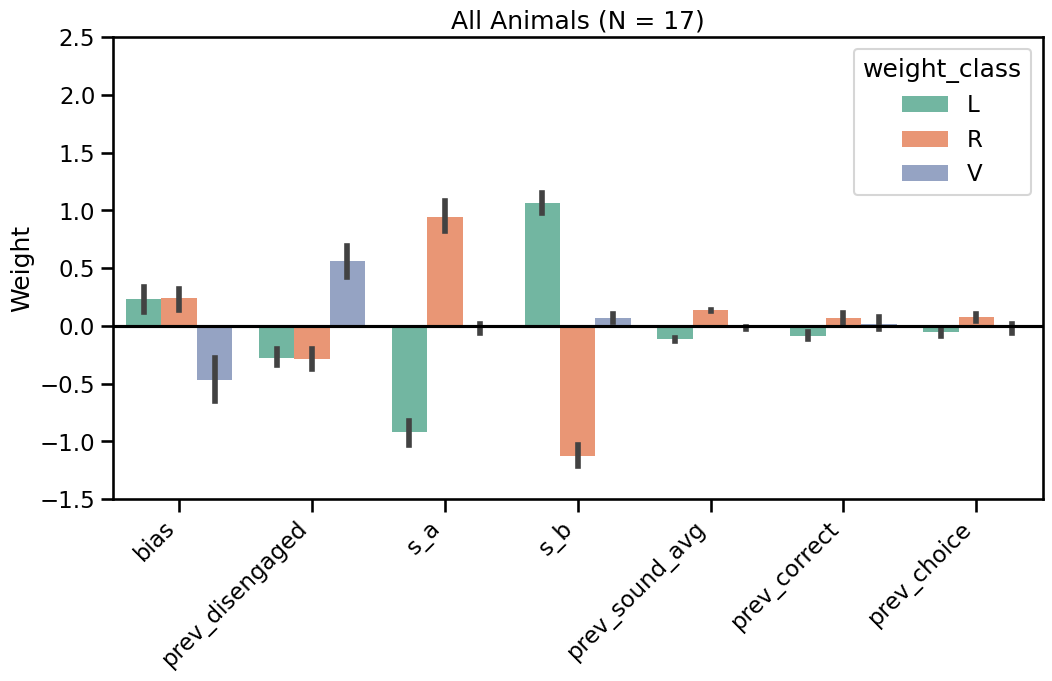

In [13]:
mv.plot_weights_summary(palette=palette, order=order)
plt.ylim(-1.5, 2.5)

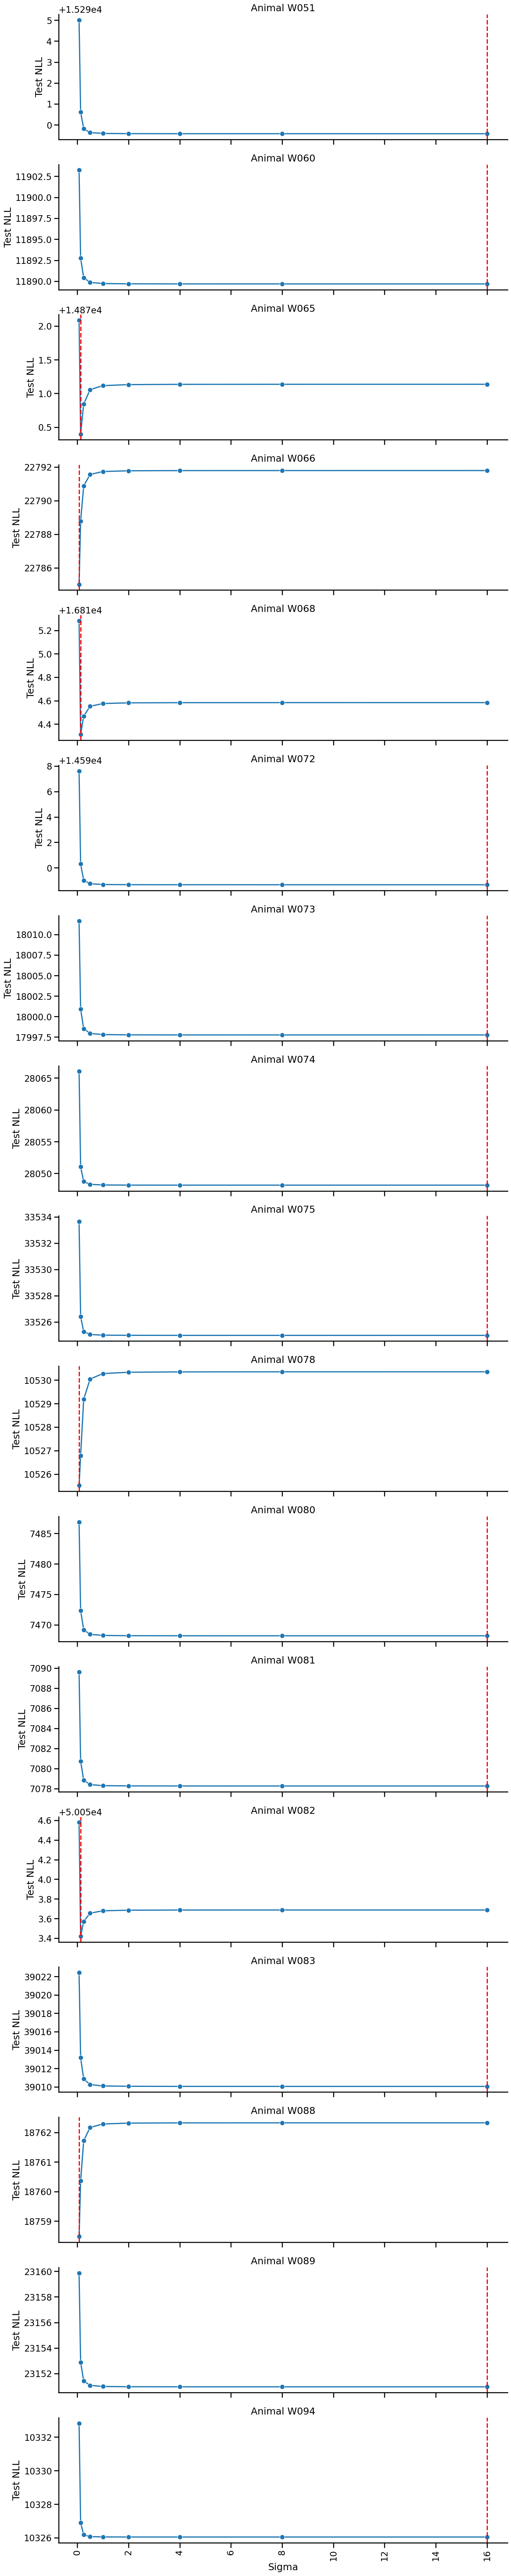

In [7]:
mv.plot_nll_over_sigmas_by_animal()

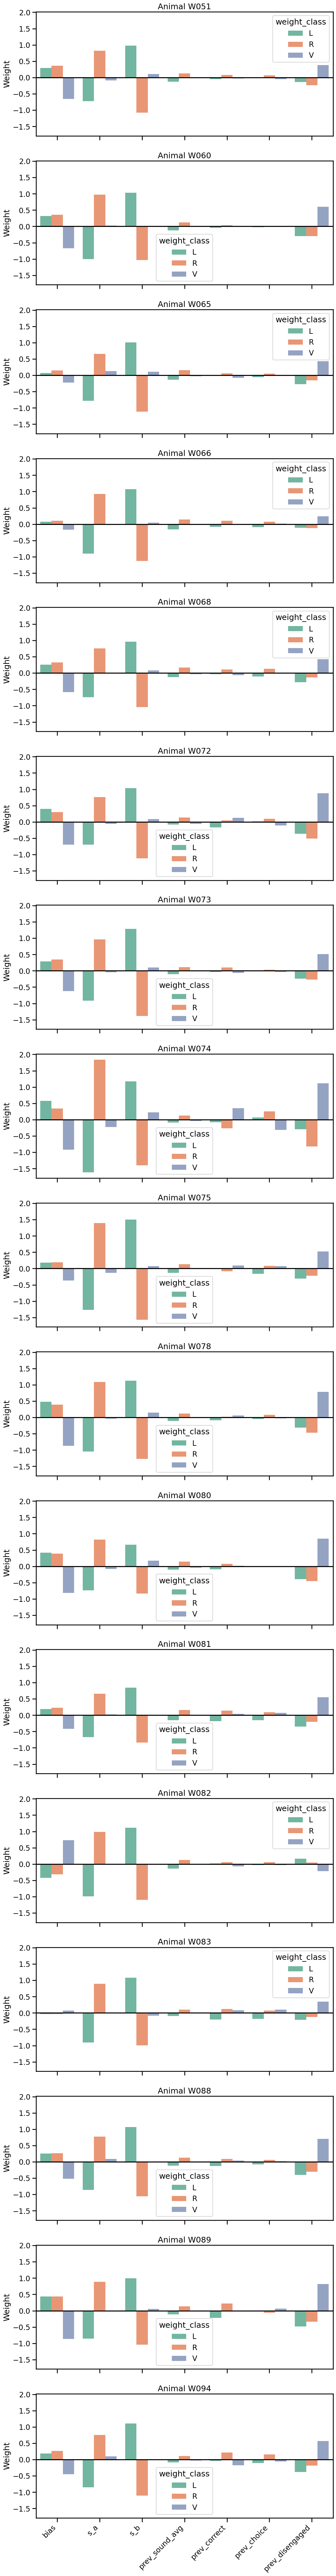

In [8]:
mv.plot_weights_by_animal(palette=palette)